In [59]:
import os
import re
import h5py
import corner
import numpy as np
import pandas as pd
import vallog as vl
import matplotlib.pyplot as plt

In [60]:
msg = vl.Logger()

In [61]:
input_file: str = input("path/to/hdf5/file: ")
if input_file == "":
    input_file = "../data/gambit-output/FS_MSSM7atQ/samples/MSSM7atQ.hdf5"
if not os.path.exists(input_file):
    raise FileNotFoundError(f"File {input_file} does not exist.")
if "hdf5" not in input_file:
    raise ValueError(f"File {input_file} is not a hdf5 file.")

msg.log(f"Inspecting file {input_file}", vl.info)

[Info]                  Inspecting file
                        /home/vallereichi/mssmscanning/data/gambit-output/SP_MSSM19atQ_spectrum/samples/MSSM19atQ.hdf5


In [64]:
hdf5 = h5py.File(input_file, "r")['MSSM']
hdf5_df = pd.DataFrame({key: hdf5[key][:] for key in hdf5.keys()})
input_parameters = []
pattern = re.compile(r'#MSSM.*atQ_parameters @MSSM.*atQ::primary_parameters::(?!.*_isvalid).*$')
for key in hdf5.keys():
    print(key)
    match = pattern.search(key)
    if match:
        input_parameters.append(match.group())

labels = [string.split('::')[-1] for string in input_parameters]
parameter_df = hdf5_df[input_parameters]
parameter_df.columns = labels
parameter_df = parameter_df.loc[:, parameter_df.nunique() > 2]
print(parameter_df)

mask = hdf5_df["LogLike_isvalid"] == 1
valid_models = parameter_df[mask]



msg.log(f"number of generated models: {hdf5_df.shape[0]}", vl.info)
msg.log(f"number of valid models: {valid_models.shape[0]}", vl.info)


#MSSM19atQ_parameters @MSSM19atQ::primary_parameters::Ad_3
#MSSM19atQ_parameters @MSSM19atQ::primary_parameters::Ad_3_isvalid
#MSSM19atQ_parameters @MSSM19atQ::primary_parameters::Ae_3
#MSSM19atQ_parameters @MSSM19atQ::primary_parameters::Ae_3_isvalid
#MSSM19atQ_parameters @MSSM19atQ::primary_parameters::Au_3
#MSSM19atQ_parameters @MSSM19atQ::primary_parameters::Au_3_isvalid
#MSSM19atQ_parameters @MSSM19atQ::primary_parameters::M1
#MSSM19atQ_parameters @MSSM19atQ::primary_parameters::M1_isvalid
#MSSM19atQ_parameters @MSSM19atQ::primary_parameters::M2
#MSSM19atQ_parameters @MSSM19atQ::primary_parameters::M2_isvalid
#MSSM19atQ_parameters @MSSM19atQ::primary_parameters::M3
#MSSM19atQ_parameters @MSSM19atQ::primary_parameters::M3_isvalid
#MSSM19atQ_parameters @MSSM19atQ::primary_parameters::Qin
#MSSM19atQ_parameters @MSSM19atQ::primary_parameters::Qin_isvalid
#MSSM19atQ_parameters @MSSM19atQ::primary_parameters::SignMu
#MSSM19atQ_parameters @MSSM19atQ::primary_parameters::SignMu_isvalid
#M

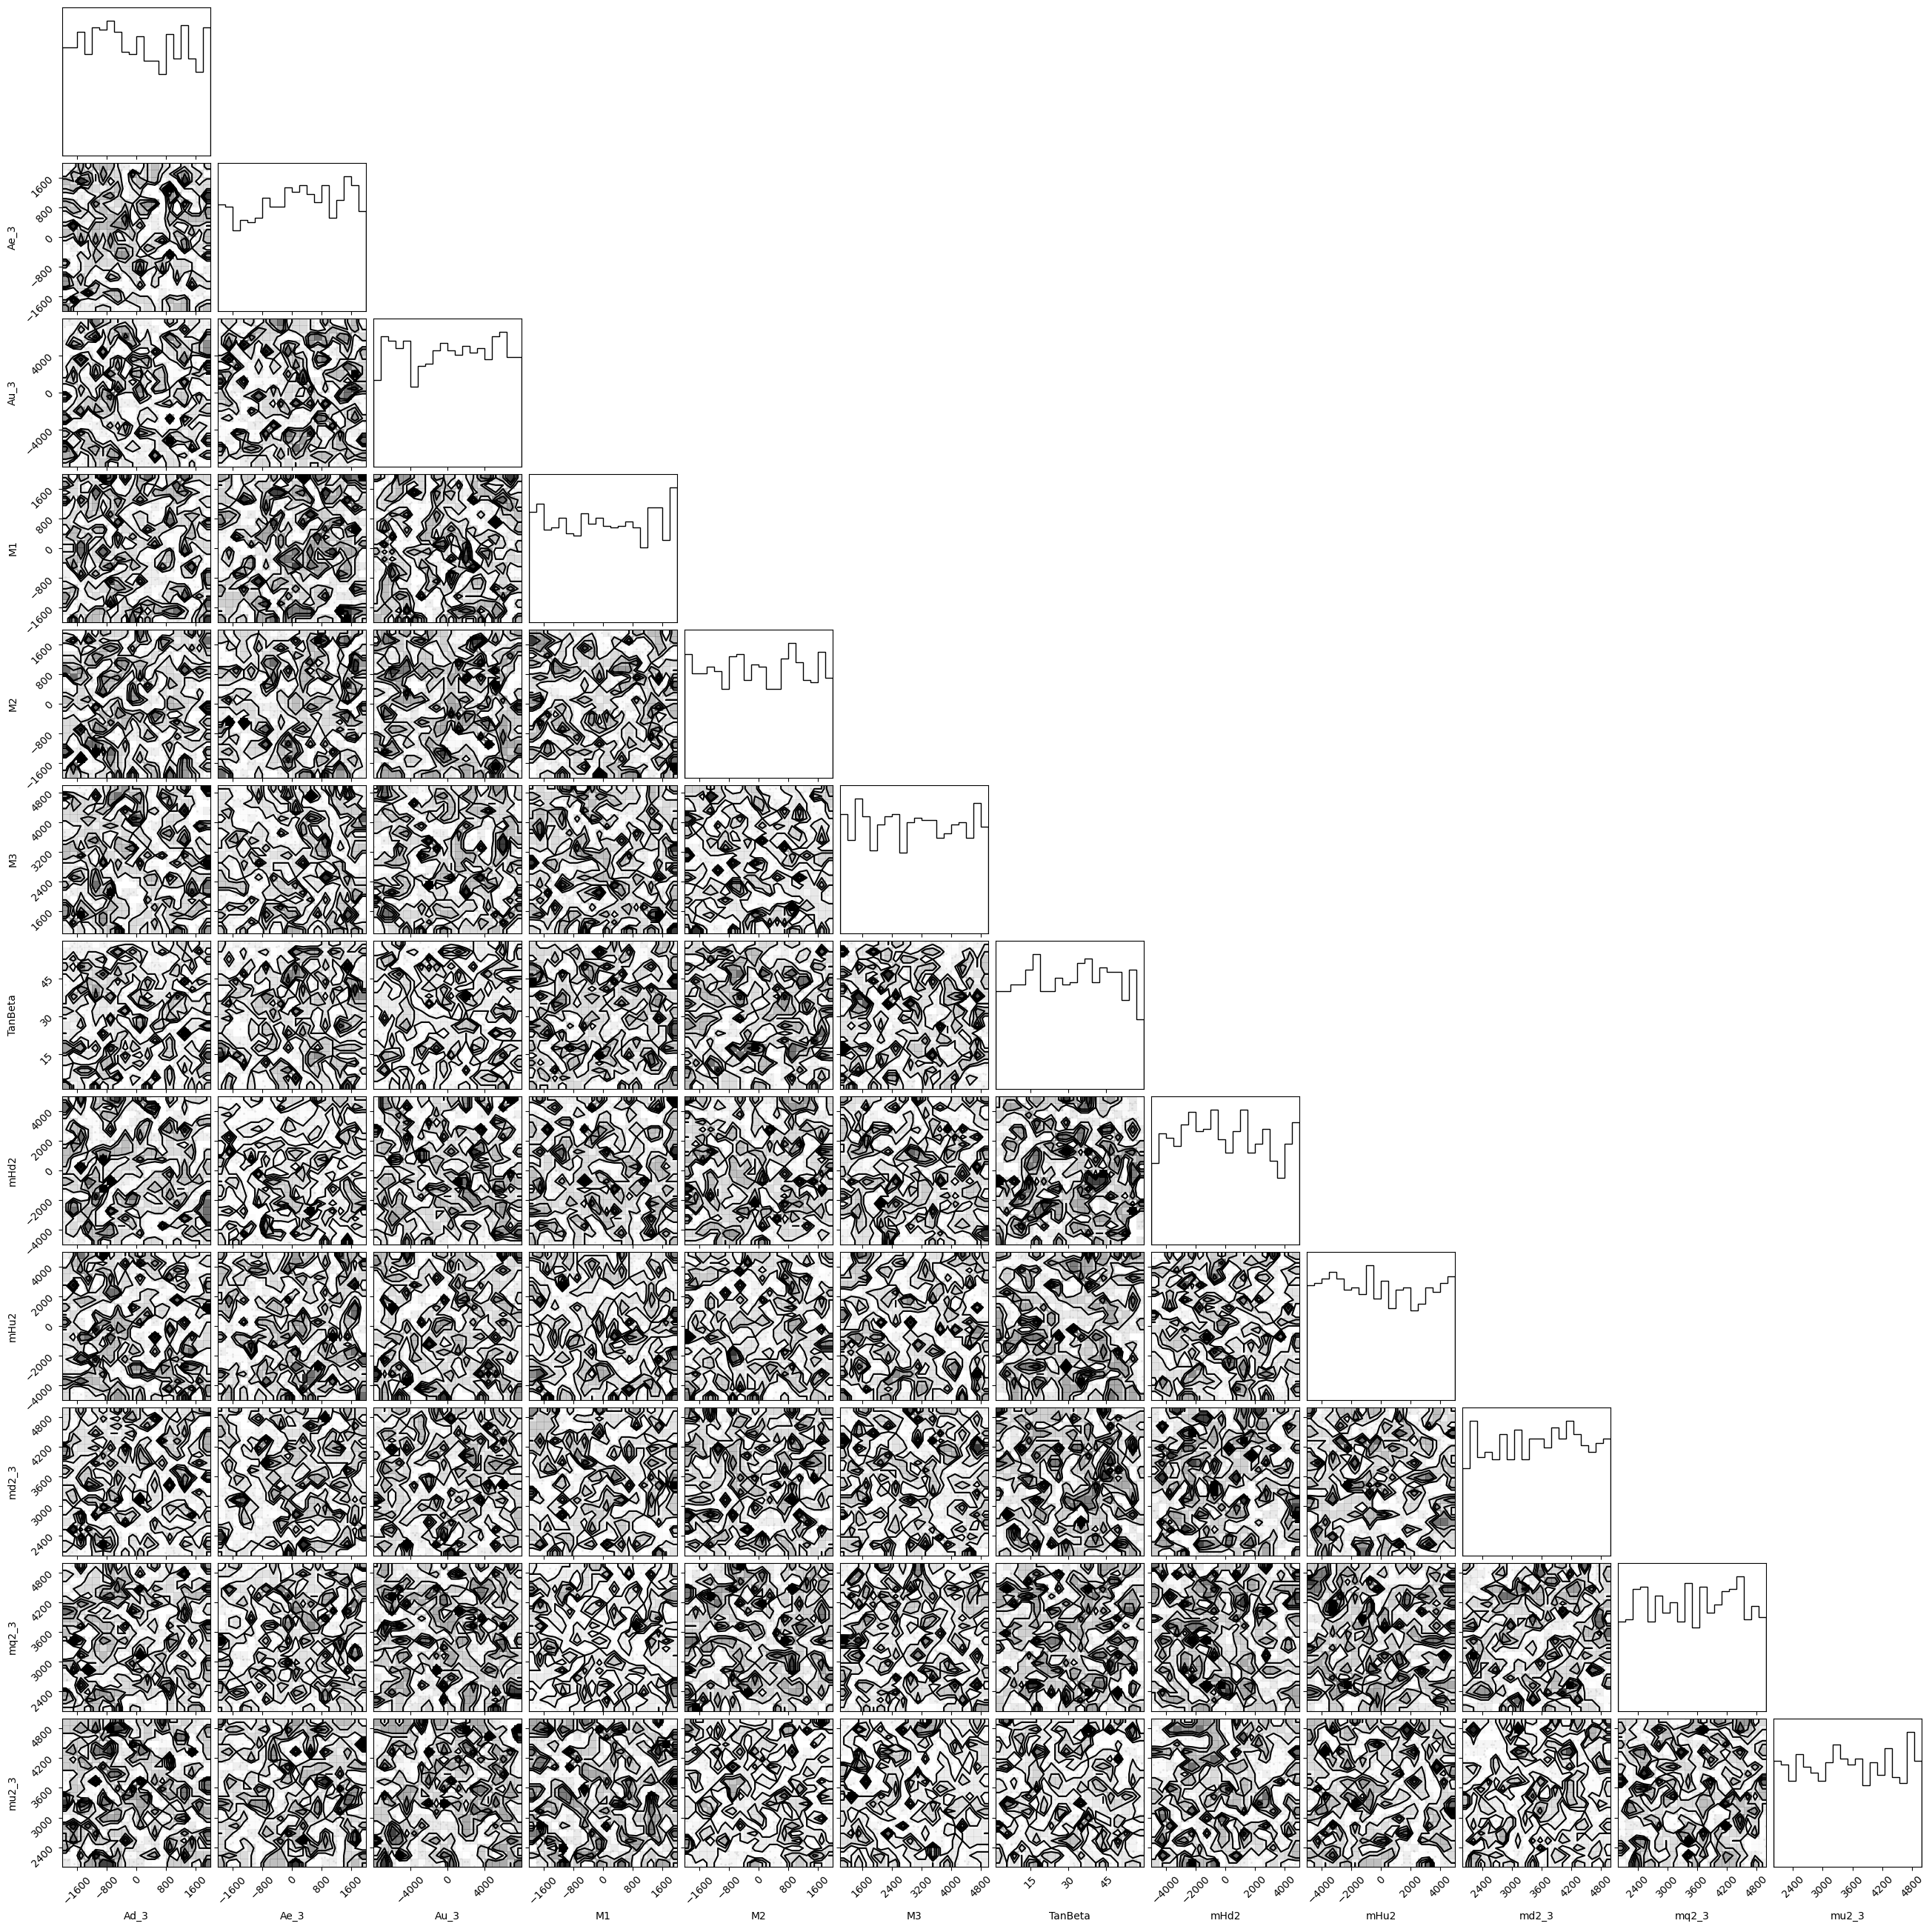

In [63]:
corner_fig = corner.corner(valid_models, labels=parameter_df.columns)
corner_fig.savefig(f"plots/gambit-{input_file.split('/')[-1]}-corner.png")